In [1]:
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, LpStatus
import matplotlib.pyplot as plt

**Robustní problém klenotvnictví**
- umožňuje iterovat přes všechny hondoty gamma, ukládá výsledky pro každou hodnotu gamma

In [4]:
# určení kriteriální funkce

def vypocet_modelu(gamma):  

    model = LpProblem(name= f"TrtzbyKlenotnictvi_gamma_{gamma}", sense=LpMaximize)

# stanovení rozhodovacích proměnných
# x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 5)}

    x = LpVariable(name="narhdelniky", lowBound=0)
    y = LpVariable(name="prsteny", lowBound=0)
    p1 = LpVariable(name="p1", lowBound=0)
    p2 = LpVariable(name="p2", lowBound=0)
    z = LpVariable(name="z", lowBound=0)

# podmínky modelu

    model += (1 * x + 1 * y <=24, "kapacita mateiriálu")
    model += (1 * x + 0.5 * y + 1 * p1 + 1 * p2 + gamma * z <= 16, "material")
    model += (1 * x >= 10, "min pozadavek na x1")
    model += (-0.1 * x + 1 * p1 + 1 * z >= 0, "robustní podminka 1")
    model += (-0.25 * y + 1 * p2 + 1 * z >= 0, "robustní podminka 2")

    # Add the objective function to the model
    model += lpSum([150 * x, 200 * y, 0 * p1, 0 * p2, 0 * z])

    status = model.solve()

    return {
        "status": LpStatus[model.status],
        "x": x.value(),
        "y": y.value(),
        "p1": p1.value(),
        "p2": p2.value(),
        "z": z.value(),
        "kriterialni_funkce": model.objective.value()
    }

In [5]:
# iterace přes gammu

def iterace_gamma(gamma_values):
    vysledky = {}
    for gamma in gamma_values:
        vysledky[gamma] = vypocet_modelu(gamma)
    return vysledky

In [6]:
# spuštění výpočtu pro všechny hodnoty `gamma`

gamma_values = [0,1,2]
vysledky = iterace_gamma(gamma_values)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/y_/_sb1h7x96dxdltm580jtjdsr0000gn/T/4415589008d54cbb927d382001518773-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/y_/_sb1h7x96dxdltm580jtjdsr0000gn/T/4415589008d54cbb927d382001518773-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 26 RHS
At line 32 BOUNDS
At line 33 ENDATA
Problem MODEL has 5 rows, 5 columns and 13 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-3) rows, 2 (-3) columns and 4 (-9) elements
0  Obj 1500 Dual inf 350 (2)
1  Obj 3900
Optimal - objective value 3900
After Postsolve, objective 3900, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 3900 - 1 iterations time 0.002, Presolve 0.00
Option for print

In [7]:
# vypis vysledku

for gamma, vysledek in vysledky.items():
    print(f"Gamma: {gamma}, Výsledky: {vysledek}")

Gamma: 0, Výsledky: {'status': 'Optimal', 'x': 10.0, 'y': 12.0, 'p1': 0.0, 'p2': 0.0, 'z': 3.0, 'kriterialni_funkce': 3900.0}
Gamma: 1, Výsledky: {'status': 'Optimal', 'x': 10.0, 'y': 8.0, 'p1': 0.0, 'p2': 1.0, 'z': 1.0, 'kriterialni_funkce': 3100.0}
Gamma: 2, Výsledky: {'status': 'Optimal', 'x': 10.0, 'y': 6.6666667, 'p1': 1.0, 'p2': 1.6666667, 'z': 0.0, 'kriterialni_funkce': 2833.33334}


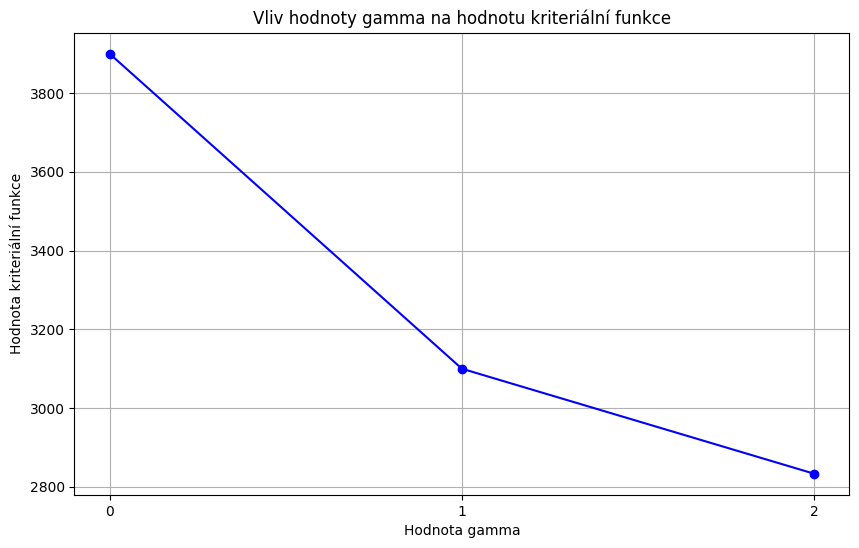

In [8]:
gamma_list = list(vysledky.keys())
kriterialni_funkce_values = [vysledek['kriterialni_funkce'] for vysledek in vysledky.values()]

plt.figure(figsize=(10, 6))
plt.plot(gamma_list, kriterialni_funkce_values, marker='o', linestyle='-', color='b')
plt.title('Vliv hodnoty gamma na hodnotu kriteriální funkce')
plt.xlabel('Hodnota gamma')
plt.ylabel('Hodnota kriteriální funkce')
plt.grid(True)
plt.xticks(gamma_list)
plt.show()